# pyCUBs is a package for codon usage bias analysis using Python.

It provides not only the calculation of several popular codon bias indices, but also several conventional codon usage bias analysis methods, such as neutrality plot analysis, ENC-GC3s plot analysis, parity rule 2-bias plot analysis, optimal codon analysis, correspondence analysis, principal component analysis, and phylogenetic analysis. It provides an interactive analysis method for freely exploring codon bias and visualizing these results.


scipy >= 1.10.1

skbio >= 0.6.3

numpy >= 1.26.3

python >= 3.6

pandas >= 2.2.2

prince >= 0.13.0

seaborn >= 0.13.1

matplotlib >= 3.8.2



In [18]:
from setuptools import setup, find_packages

setup(name="pycubs",
      version="2.0",
      description='An integrated package for codon usage bias analysis',
      url='https://github.com/thecgs/pyCUBs/',
      author='Guisen Chen',
      author_email='thecgs001@foxmail.com',
      long_description="It provides not only the calculation of several popular codon bias indices, but also several conventional codon usage bias analysis methods, such as neutrality plot analysis, ENC-GC3s plot analysis, parity rule 2-bias plot analysis, optimal codon analysis, correspondence analysis, principal component analysis, and phylogenetic analysis. It provides an interactive analysis method for freely exploring codon bias and visualizing these results.",
      license='MIT License',
      packages=find_packages(exclude=["example", ".github"]),
      keywords=['bioinformatics', 'codon usage bias', 'codonW', 'cusp'],
      install_requires=["scipy>=1.10.1",
                        "skbio>=0.6.3",
                        "numpy>=1.26.3",
                        "pandas>=2.2.2",
                        "prince>=0.13.0",
                        "seaborn>=0.13.1",
                        "matplotlib>=3.8.2"]
     )

AttributeError: 'tuple' object has no attribute 'tb_frame'

In [1]:
import sys
sys.path.append('/mnt/nfs1/jupyter/pyCUBs/') # import library path
import pycubs

print(pycubs.CodonTables())
print(pycubs.__author__)
print("Function:", pycubs.__all__)
print("Version:", pycubs.__version__)

data = [("C. argus", "Cephalopholis_argus.cds.fasta"),
        ("C. boenak", "Cephalopholis_boenak.cds.fasta"),
        ("C. cruentata", "Cephalopholis_cruentata.cds.fasta"),
        ("C. fulva.cds.fasta", "Cephalopholis_fulva.cds.fasta"),
        ("C. leopardus", "Cephalopholis_leopardus.cds.fasta"),
        ("C. miniata", "Cephalopholis_miniata.cds.fasta"),
        ("C. panamensis", "Cephalopholis_panamensis.cds.fasta"),
        ("C. sexmaculata", "Cephalopholis_sexmaculata.cds.fasta"),
        ("C. sonnerati", "Cephalopholis_sonnerati.cds.fasta"),
        ("C. spiloparaea", "Cephalopholis_spiloparaea.cds.fasta"),
        ("C. urodeta", "Cephalopholis_urodeta.cds.fasta"),
        ("H. haifensis", "Hyporthodus_haifensis.cds.fasta"),
        ("H. niveatus", "Hyporthodus_niveatus.cds.fasta"),
        ("H. octofasciatus", "Hyporthodus_octofasciatus.cds.fasta"),
        ("H. septemfasciatus", "Hyporthodus_septemfasciatus.cds.fasta"),
        ("P. areolatus", "Plectropomus_areolatus.cds.fasta"),
        ("P. laevis", "Plectropomus_laevis.cds.fasta"),
        ("P. leopardus", "Plectropomus_leopardus.cds.fasta")
       ]

Reference website: https://www.ncbi.nlm.nih.gov/Taxonomy/taxonomyhome.html/index.cgi?chapter=tgencodes

Translate Tables/Genetic Codes:
 1: Standard
 2: Vertebrate Mitochondrial
 3: YeastMitochondrial
 4: Mold Mitochondrial, Protozoan Mitochondrial, Coelenterate Mitochondrial, Mycoplasma, Spiroplasma
 5: Invertebrate Mitochondrial
 6: Ciliate Nuclear, Dasycladacean Nuclear, Hexamita Nuclear
 9: Echinoderm Mitochondrial, Flatworm Mitochondrial
10: Euplotid Nuclear
11: Bacterial, Archaeal, Plant Plastid
12: Alternative Yeast Nuclear
13: Ascidian Mitochondrial
14: Alternative Flatworm Mitochondrial
16: Chlorophycean Mitochondrial
21: Trematode Mitochondrial
22: Scenedesmus obliquus Mitochondrial
23: Thraustochytrium Mitochondrial
24: Rhabdopleuridae Mitochondrial
25: Candidate Division SR1, Gracilibacteria
26: Pachysolen tannophilus Nuclear
27: Karyorelict Nuclear
28: Condylostoma Nuclear
29: Mesodinium Nuclear
30: Peritrich Nuclear
31: Blastocrithidia Nuclear
33: Cephalodiscidae Mitochon

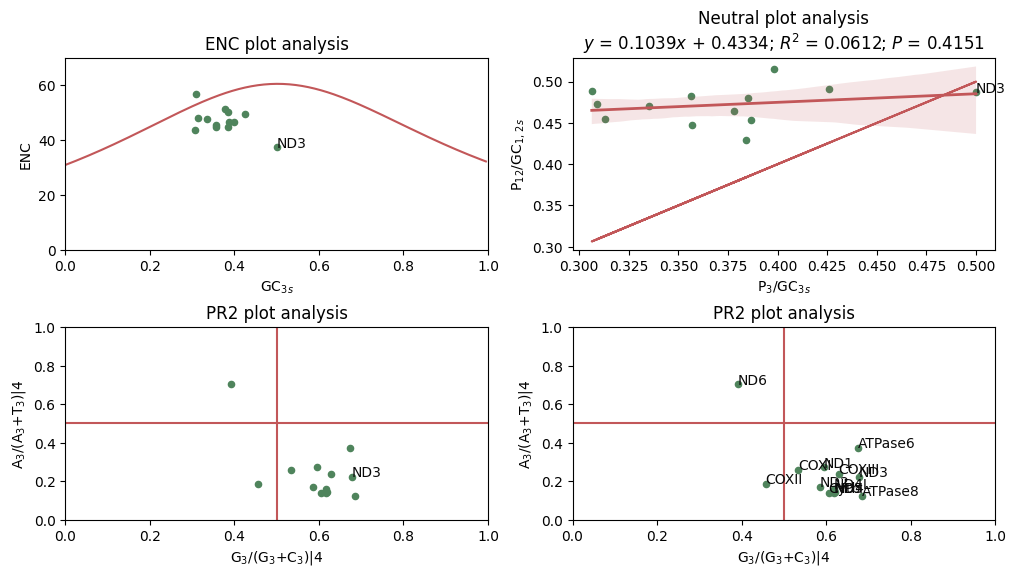

In [2]:
# Switch the test work path and import test data
import os
import matplotlib.pyplot as plt

os.chdir('/mnt/nfs1/jupyter/pyCUBs/example/')
inputfile="./test_data/Min.mt.fasta"

fig, axs = plt.subplots(2,2, figsize=(12,6))
plt.subplots_adjust(hspace=0.4)

# example1: Effective number of codons analysis
ENC = pycubs.ENC_Analysis(file=data[0][1], genetic_code=2)
ENC.draw_ENC_plot(show_gene_names=["ND3"], figsize=(6,4), ax=axs[0][0])

# example2: Parity rule 2 (PR2) analysis.
NPA = pycubs.NPA_Analysis(file=data[0][1], genetic_code=2)
NPA.draw_NPA_plot(show_gene_names=["ND3"], figsize=(6,4), ax=axs[0][1])

# example3: Neutral plot analysis.
PR2 = pycubs.PR2_Analysis(file=data[0][1], genetic_code=2)
PR2.draw_PR2_plot(show_gene_names=["ND3"], figsize=(6,4), ax=axs[1][0])
PR2.draw_PR2_plot(show_gene_names=True, figsize=(6,4), ax=axs[1][1])

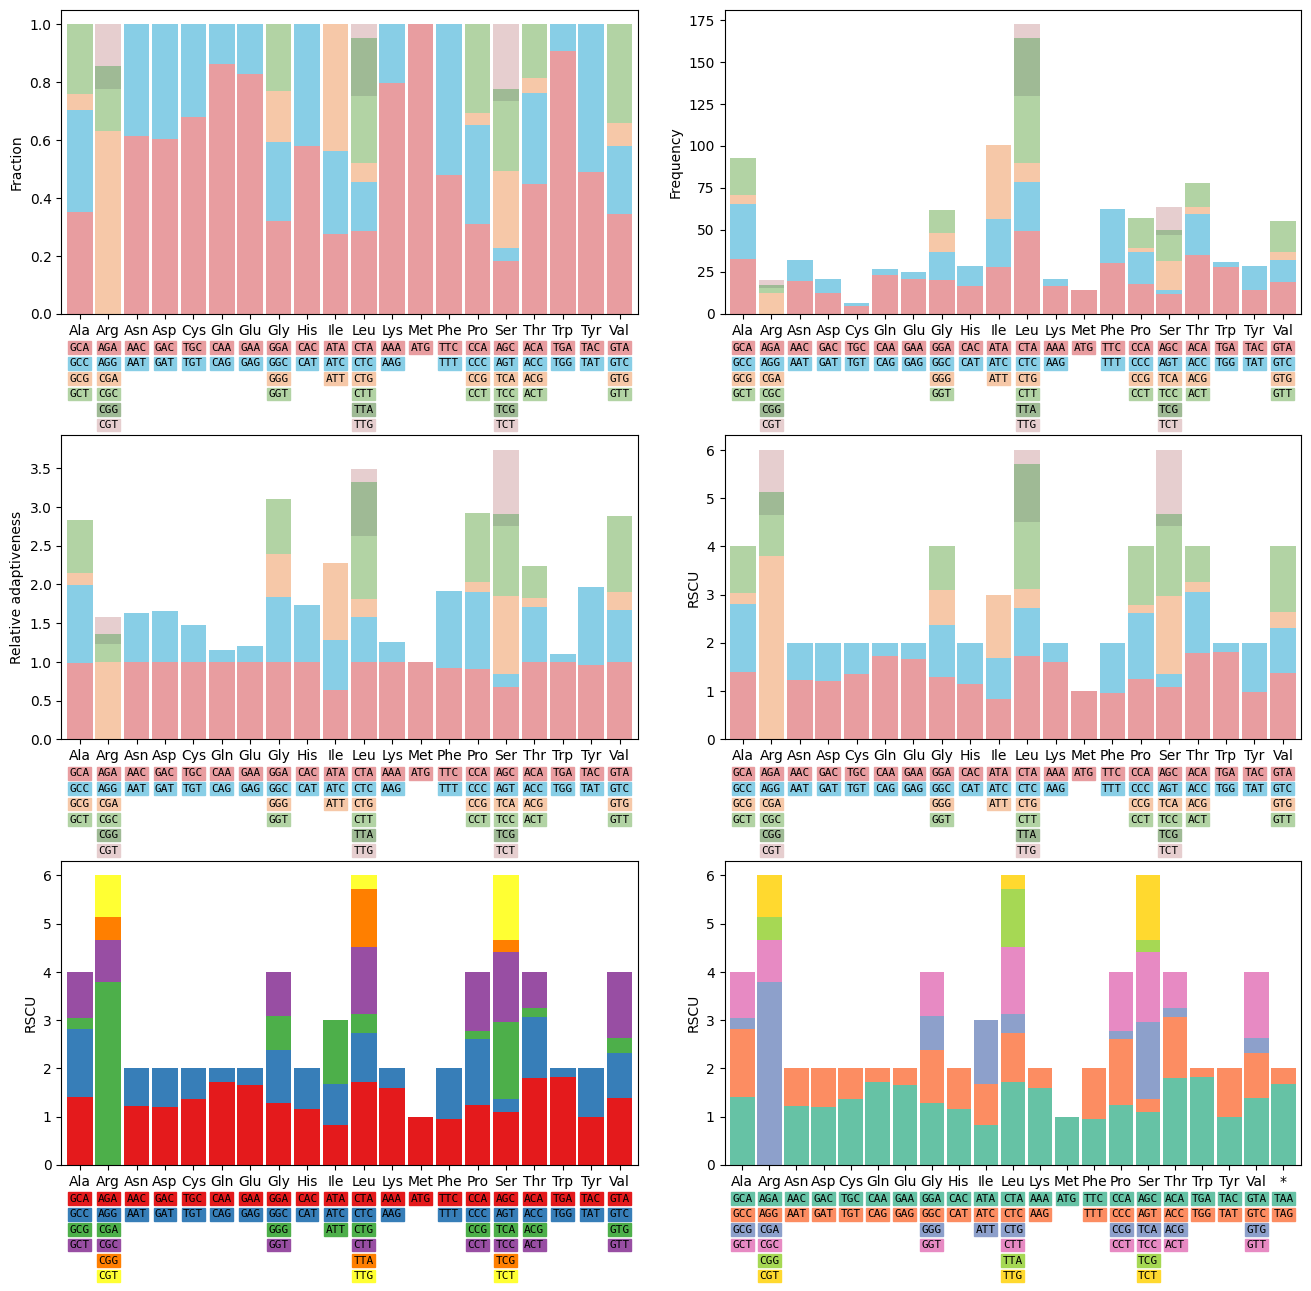

In [3]:
# example4: compute Obs, Franction, Frequency, RSCU

# Calculate
Obs=pycubs.get_Obs(seqences=data[0][1], genetic_code=4) #The seqences parameter can be a string of gene sequence or a list. For example, a list of all CDS sequences of a chloroplast, so as to calculate the Obs in the whole organism
Fraction=pycubs.get_Fraction(Obs)
Frequency=pycubs.get_Frequency(Obs)
Relative_Adaptiveness=pycubs.get_Relative_Adaptiveness(Obs)
RSCU=pycubs.get_RSCU(Obs)

# Visualization
fig, axs = plt.subplots(3, 2, figsize=(16,15))
plt.subplots_adjust(wspace=0.15, hspace=0.4)
Fraction.draw_barplot(ax=axs[0][0])
Frequency.draw_barplot(ax=axs[0][1])
Relative_Adaptiveness.draw_barplot(ax=axs[1][0])
RSCU.draw_barplot(ax=axs[1][1])
RSCU.draw_barplot(ax=axs[2][0], palette="Set1")
pycubs.draw_codon_barplot(RSCU, ax=axs[2][1], palette="Set2", remove_stop_codon=False)

In [5]:
# example5: Get similar results to Cusp software
# Cusp website: https://www.bioinformatics.nl/cgi-bin/emboss/cusp

GeneName, Seqence = next(pycubs.fastaIO(data[0][1]))
print("Input seqence: \n")
print(">"+GeneName+"\n", Seqence, sep="")
print("\n")

Obs = pycubs.get_Obs(seqences=Seqence, genetic_code=4) 
print("Cusp result: \n")
print(pycubs.get_cusp_like(Obs, human_format=True)) #human_format=True, Human-readable output, otherwise machine-readable.

Input seqence: 

>ND1
ATGATCTCAACGCTTTTTACACATATTATCAACCCCTTAGCCTACATTGTGCCCGTACTACTAGCAGTCGCCTTCCTTACACTAGTTGAACGTAAAGTCTTAGGTTATATACAATTTCGAAAGGGTCCCAACATTGTTGGACCTTATGGGCTGCTACAGCCAATTGCAGACGGTGTTAAACTATTTACTAAGGAACCAGTCCGTCCTTCTACCGCTTCCCCTATTCTTTTCCTGCTGGCCCCCATGCTTGCCCTTACCCTTGCCCTCGCCCTATGGGCCCCCCTTCCCATGCCTTACCCGATCCTAGACCTAAACCTAGGCATCCTCTTTATTCTAGCCCTTTCTAGCCTAGCAGTATACTCCATTTTAGGCTCAGGTTGAGCATCAAATTCAAAATATGCCCTGATCGGAGCCTTGCGAGCCGTAGCACAAACCATTTCATATGAAGTTAGTCTTGGATTAATCTTGCTAAATGCCATTATTTTCACTGGGGGCTTTACACTTCACACCTTCAATATCGCCCAAGAAACCATCTGATTACTACTACCGGCCTGACCTCTCGCTGCAATGTGATACATTTCTACCCTAGCAGAGACTAACCGAGCACCTTTTGACCTAACAGAAGGTGAATCGGAACTGGTATCAGGCTTCAACGTCGAATACGCAGGGGGGCCTTTCGCCCTGTTTTTCCTAGCAGAATACGCGAACATCCTCCTCATAAATACACTTTCTGCCACCCTATTCCTAGGAGCCTCCCACATTCCTGTCATGCCTGAGTTTACAGCTGCTAACCTAATAACAAAAGCAGCCCTCCTATCTATTCTGTTCTTGTGAGTCCGAGCCTCCTACCCACGATTTCGCTACGACCAACTAATACATCTAATCTGAAAAAACTTCCTTCCACTTACACTAGCCCTGGTTATCTGACATTTGGCGCTGCCCATTGCATTCGCTGGACTACCGCCCCAAATGTAA




In [6]:
# example6: Get similar results to codonW software.

codonW_result_df = pycubs.get_codonW_like(file=data[0][1], genetic_code=4)
codonW_result_df

,T3s,C3s,A3s,G3s,CAI,CBI,Fop,Nc,GC3s,GC,L_sym,L_aa,Gravy,Aromo
title,,,,,,,,,,,,,,
ND1,0.2867,0.3531,0.3925,0.1314,0.151,-0.017,0.371,48.70,0.415,0.468,318,324,0.864198,0.123457
ND2,0.2748,0.3477,0.4267,0.0842,0.117,-0.121,0.308,51.20,0.374,0.448,342,348,0.800000,0.080460
COXI,0.3750,0.2909,0.4236,0.0875,0.185,-0.012,0.393,47.16,0.325,0.424,508,516,0.845736,0.149225
COXII,0.4051,0.2974,0.4438,0.0662,0.195,0.046,0.421,46.70,0.301,0.407,226,230,0.432609,0.095652
ATPase8,0.2750,0.3000,0.6136,0.0952,0.125,-0.140,0.306,57.29,0.296,0.411,54,55,0.163636,0.236364
ATPase6,0.2644,0.2788,0.4789,0.1227,0.122,-0.077,0.317,44.26,0.348,0.417,224,227,1.141410,0.088106
COXIII,0.3097,0.3407,0.4949,0.0787,0.160,-0.076,0.368,45.55,0.351,0.441,259,261,0.545211,0.187739
ND3,0.1980,0.4554,0.3918,0.1294,0.118,-0.019,0.355,38.03,0.496,0.491,115,116,1.094828,0.129310
ND4L,0.3000,0.3444,0.4103,0.0833,0.131,-0.108,0.326,45.86,0.385,0.471,96,98,1.098980,0.081633


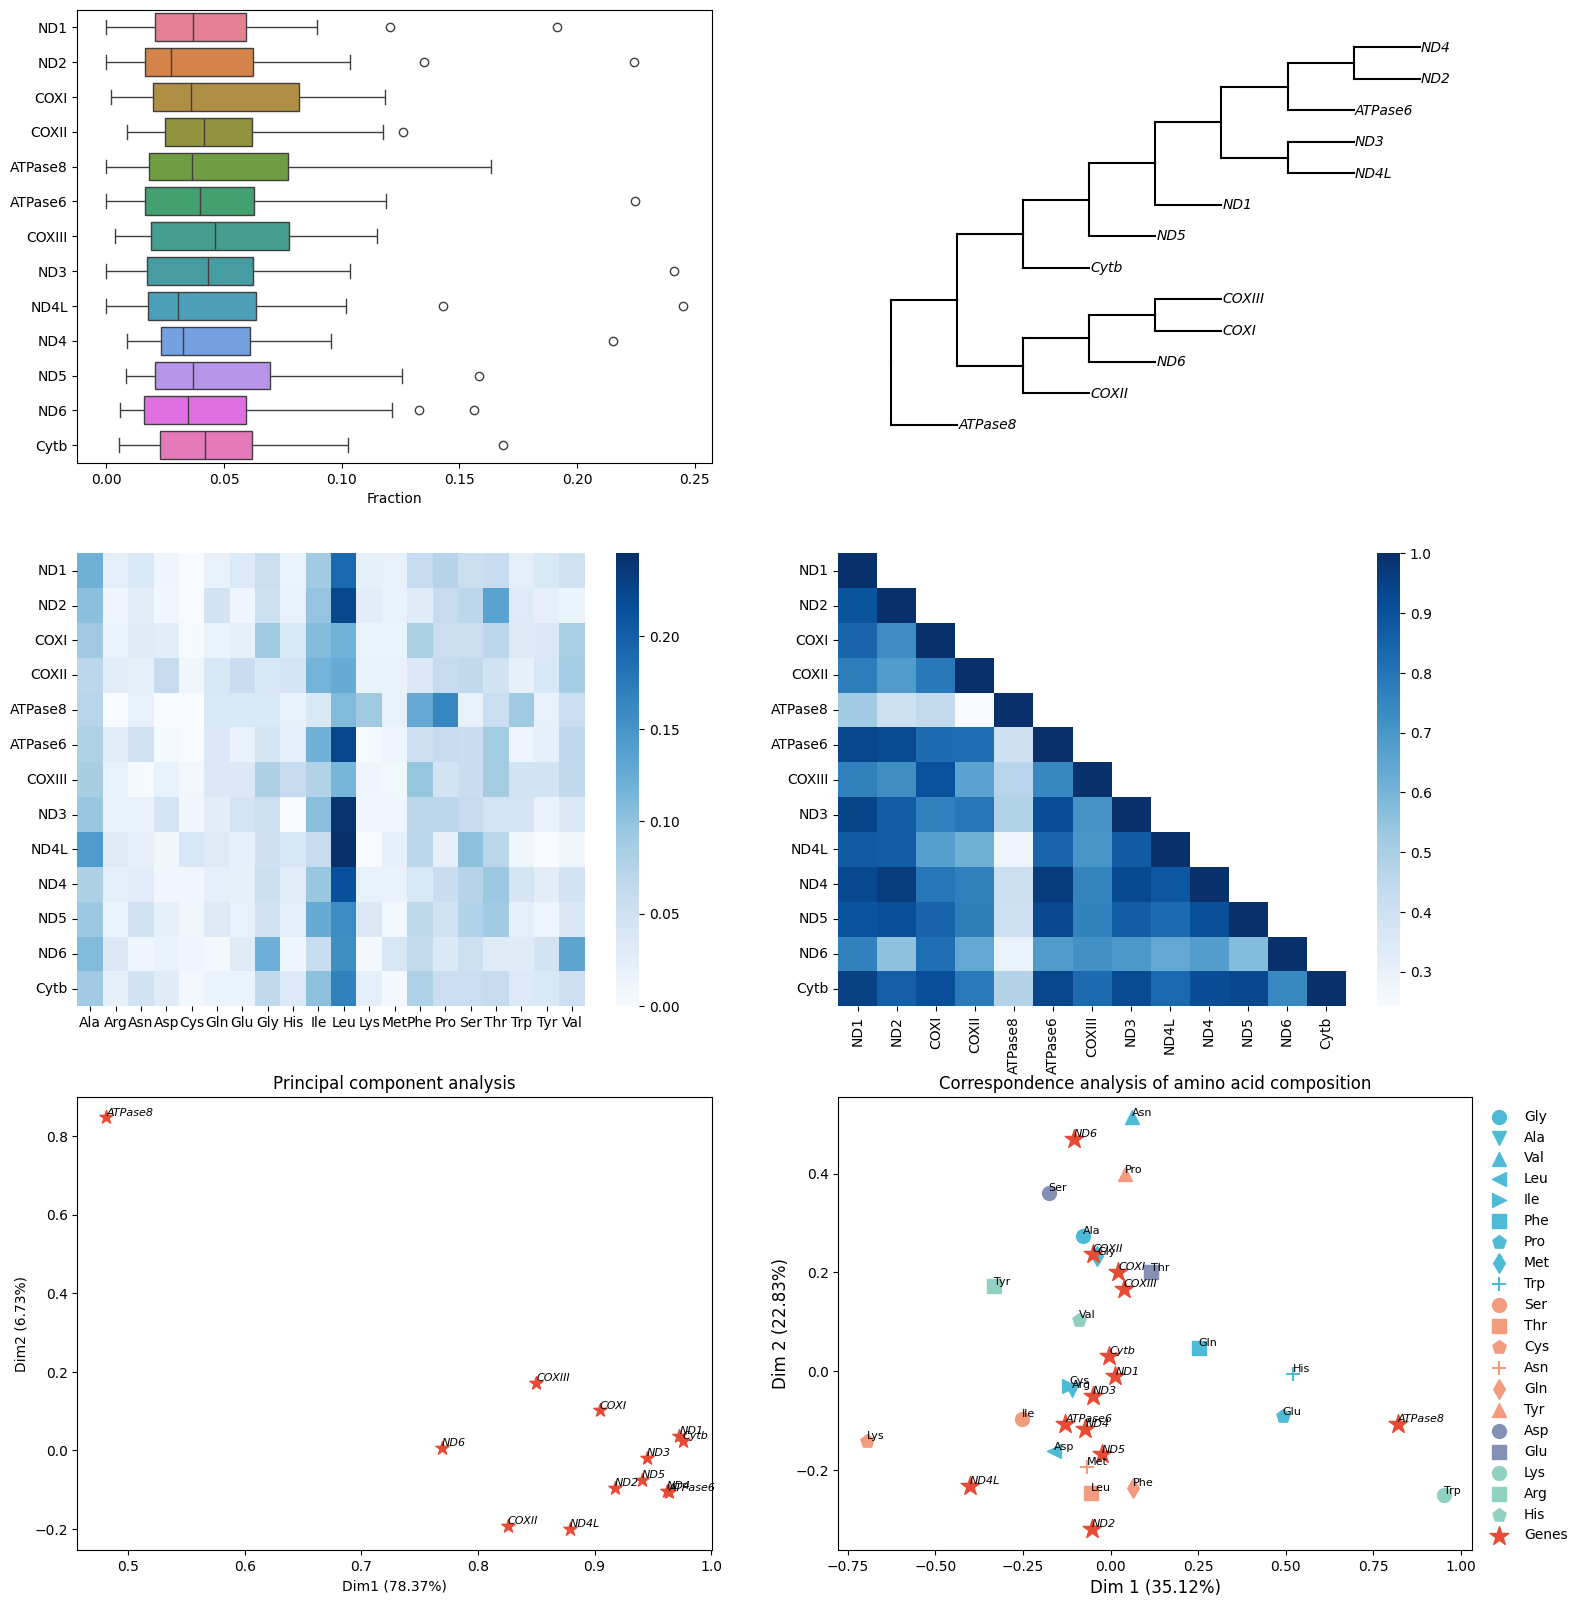

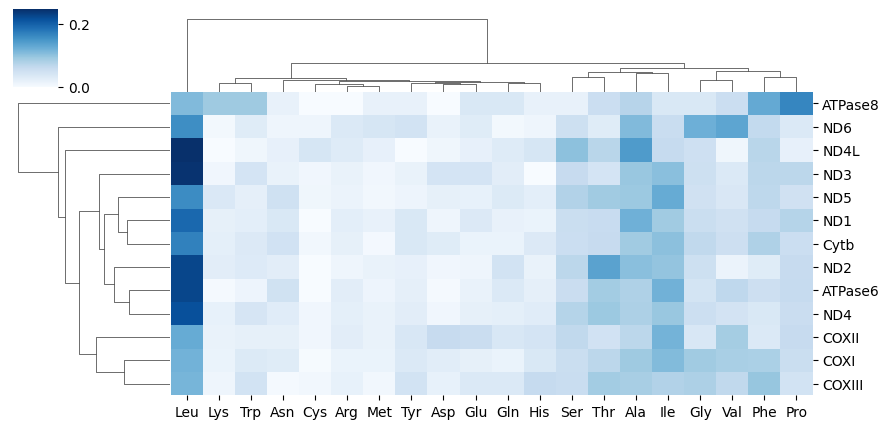

In [7]:
# example7: Analysis of the amino acid composition of each gene in a single species.

AA_Composition_Single_Species = pycubs.AA_Composition_Single_Species_Analysis(file=data[0][1], genetic_code=4)

fig, axs = plt.subplots(3,2, figsize=(18,20))
plt.subplots_adjust(hspace=0.2)

AA_Composition_Single_Species.draw_boxplot(ax=axs[0][0])
AA_Composition_Single_Species.draw_tree_plot(ax=axs[0][1])
#AA_Composition_Single_Species.draw_boxplot(ax=axs[0][1], dtype="count")
AA_Composition_Single_Species.draw_heatmap(ax=axs[1][0])
AA_Composition_Single_Species.draw_pearson_heatmap(ax=axs[1][1])
AA_Composition_Single_Species.draw_PCA_plot(ax=axs[2][0])
AA_Composition_Single_Species.draw_COA_plot(ax=axs[2][1])

AA_Composition_Single_Species.draw_clustermap()

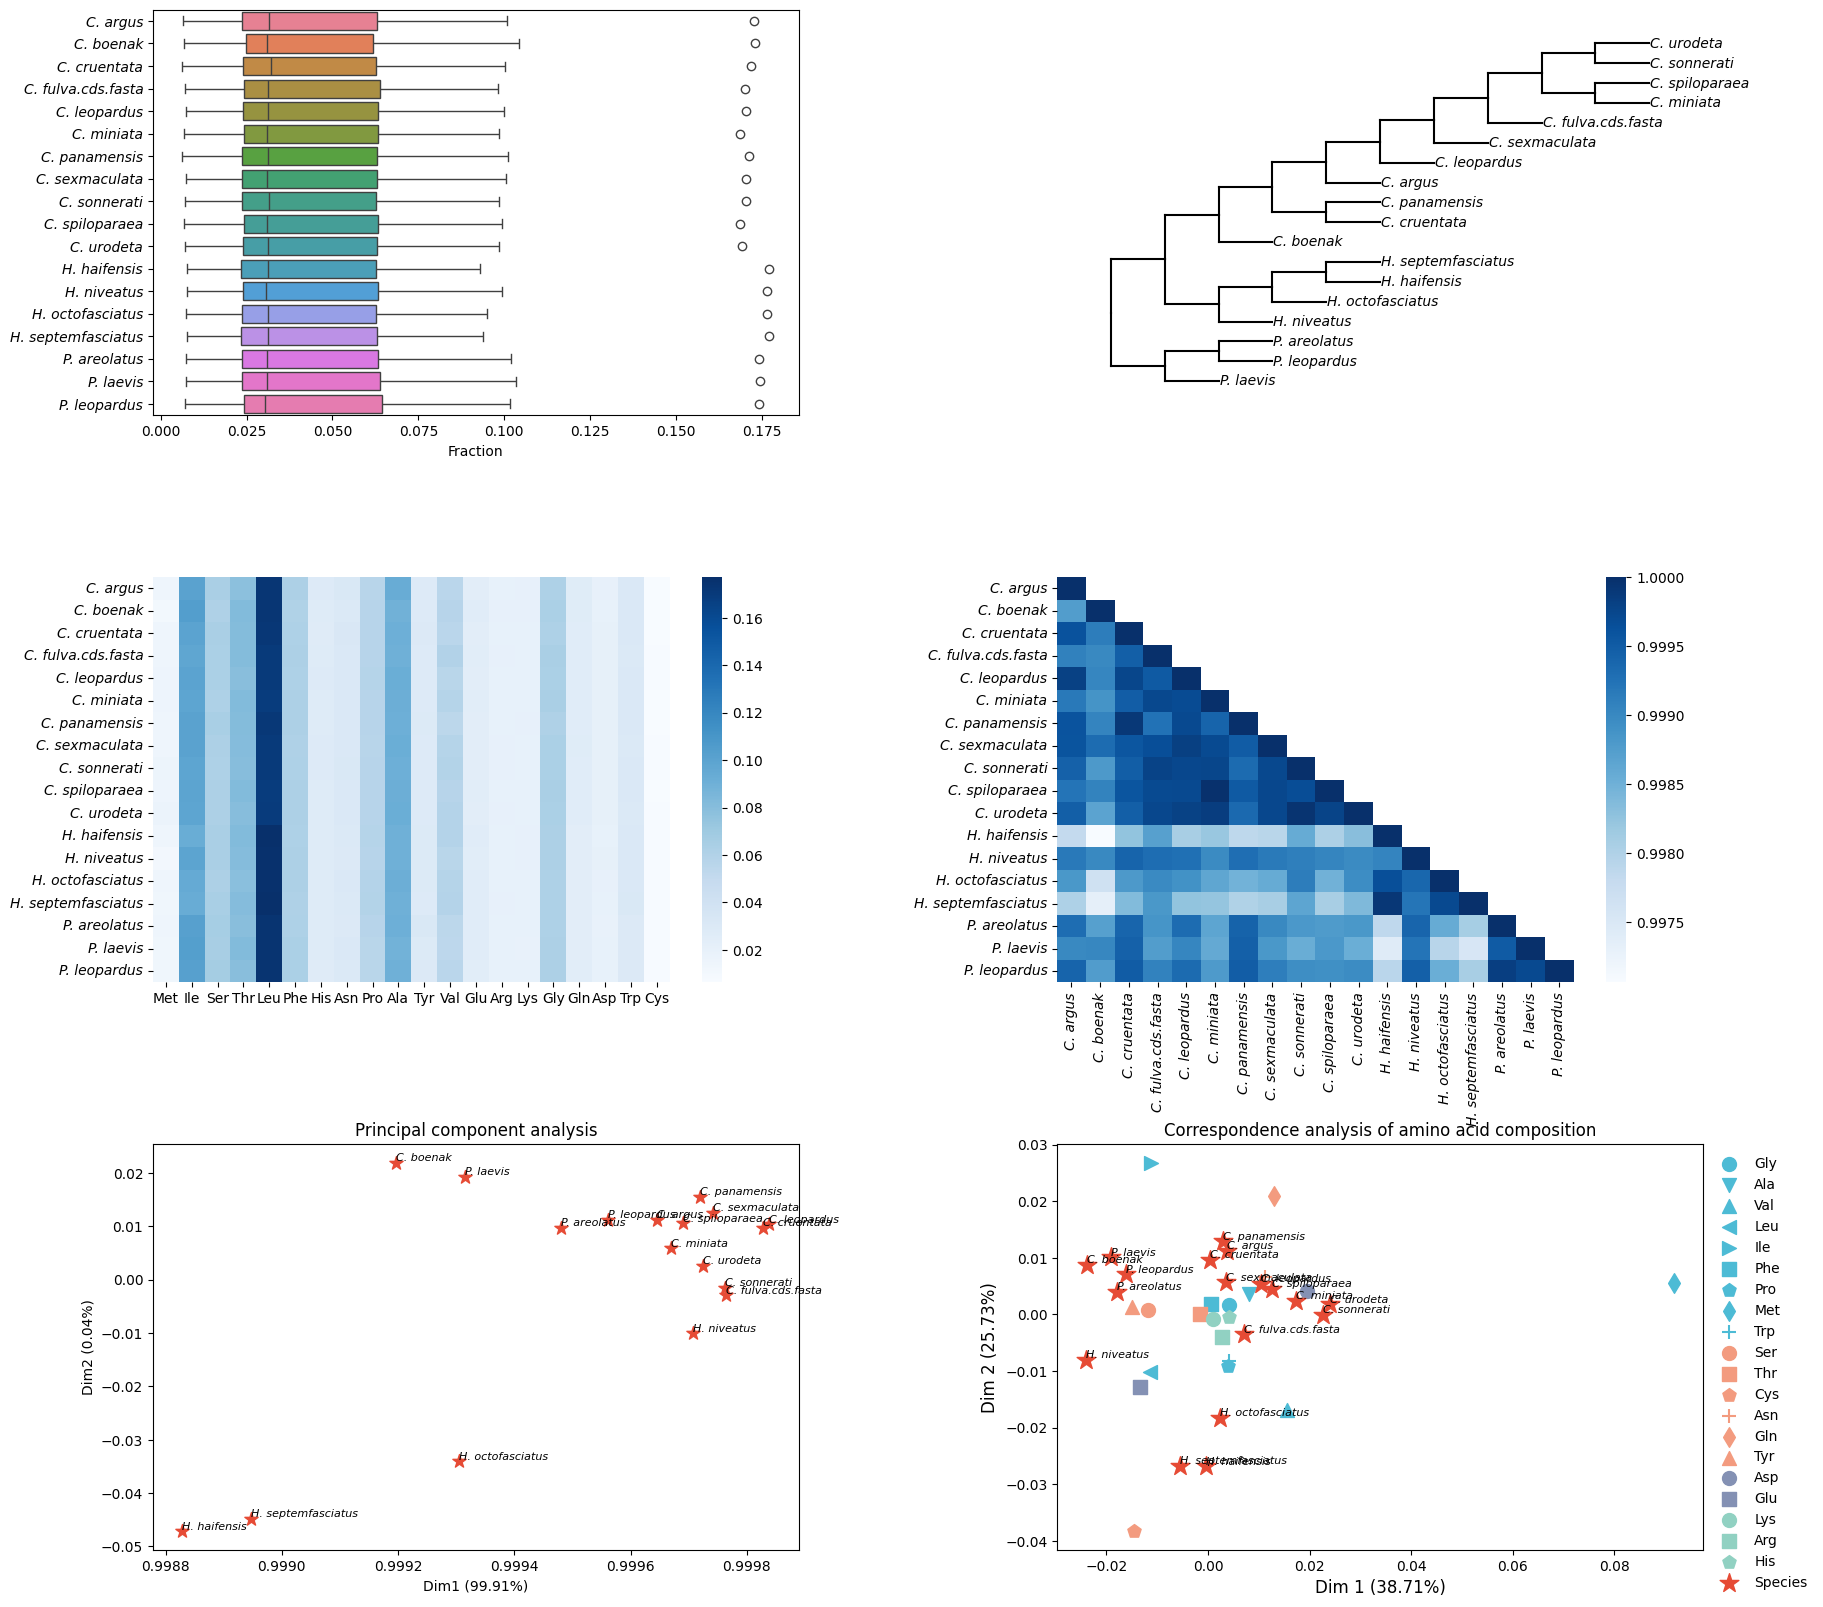

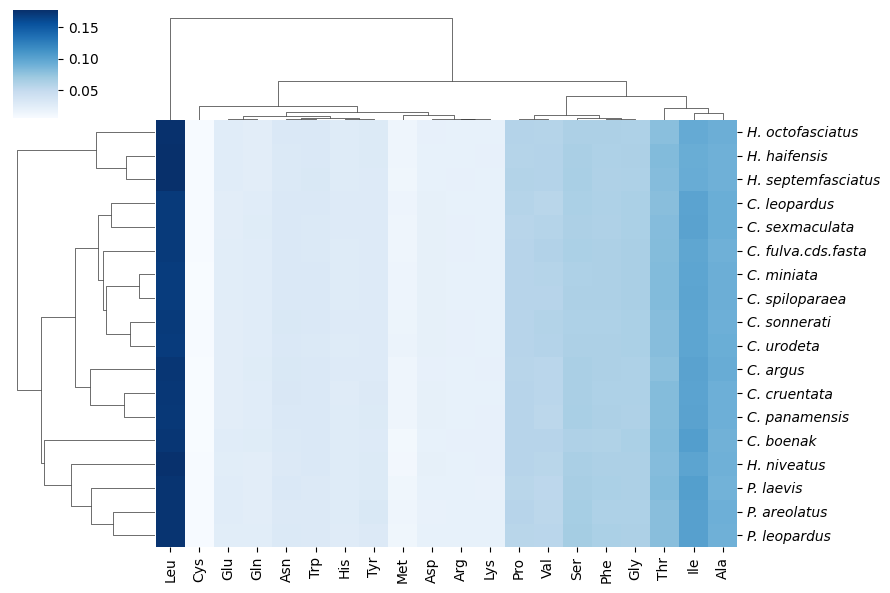

In [8]:
AA_Composition_Multiple_Species = pycubs.AA_Composition_Multiple_Species_Analysis(data=data, genetic_code=4)
fig, axs = plt.subplots(3,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.4,wspace=0.4)

AA_Composition_Multiple_Species.draw_boxplot(ax=axs[0][0])
AA_Composition_Multiple_Species.draw_tree_plot(ax=axs[0][1], outgroup=["P. areolatus", "P. laevis", "P. leopardus"])
AA_Composition_Multiple_Species.draw_heatmap(ax=axs[1][0])
AA_Composition_Multiple_Species.draw_pearson_heatmap(ax=axs[1][1])
AA_Composition_Multiple_Species.draw_PCA_plot(ax=axs[2][0])
AA_Composition_Multiple_Species.draw_COA_plot(ax=axs[2][1], show_amino_acid_labels=False)

AA_Composition_Multiple_Species.draw_clustermap()

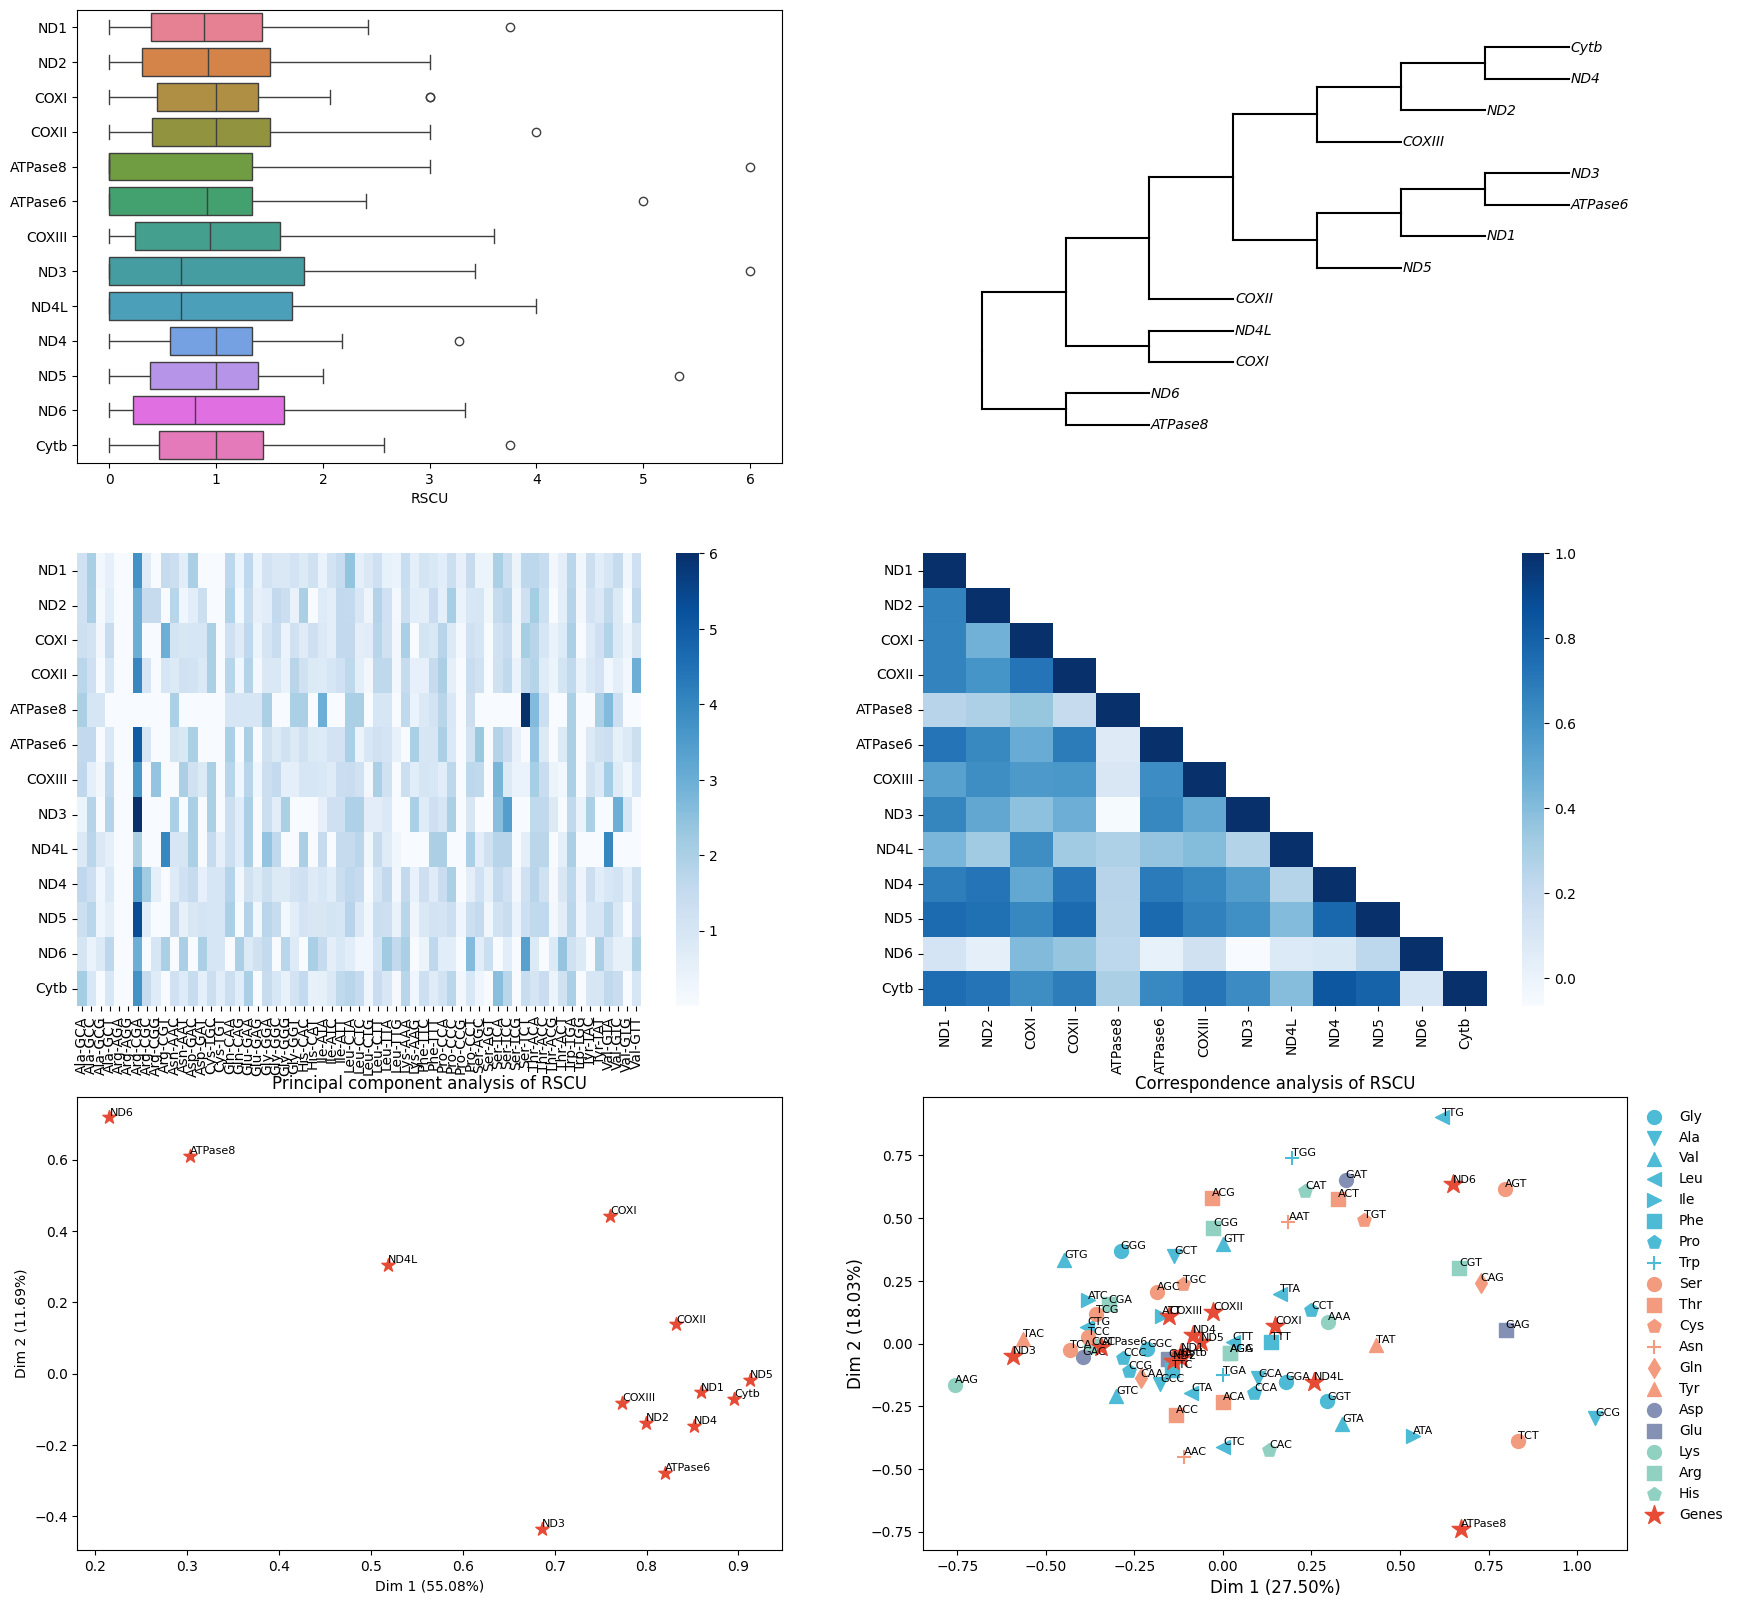

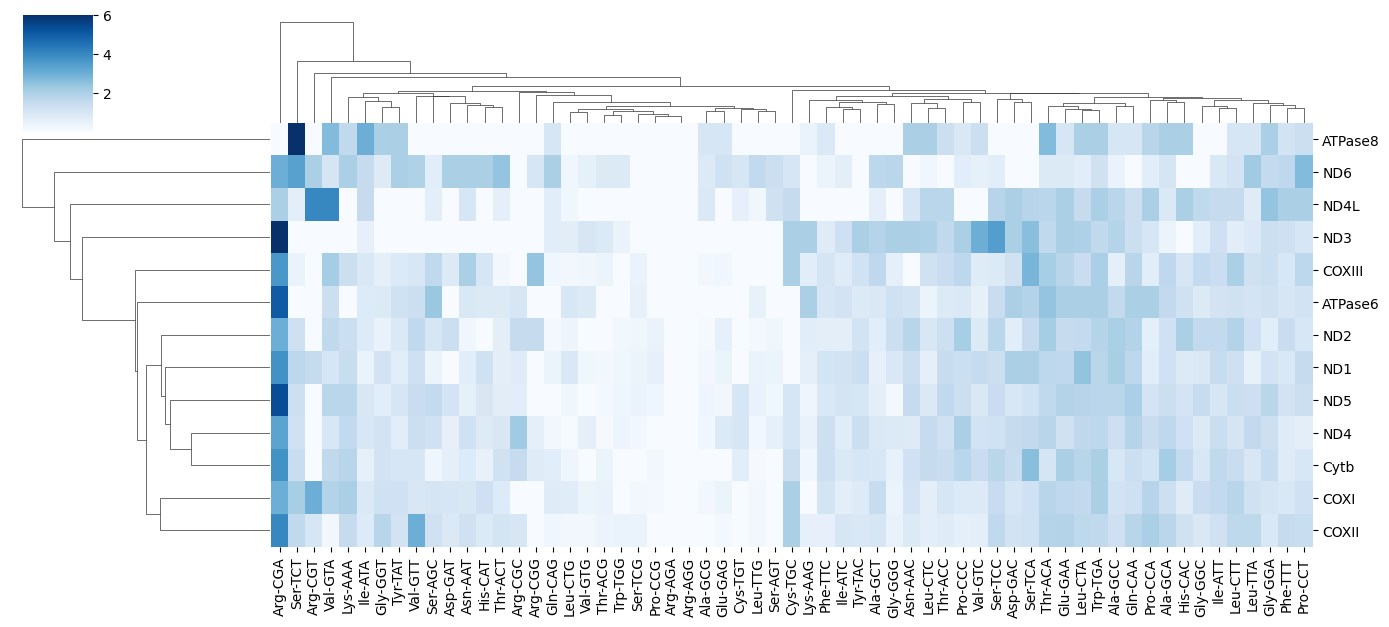

In [9]:
RSCU_Single_Species = pycubs.RSCU_Single_Species_Analysis(file=data[0][1], genetic_code=4)

fig, axs = plt.subplots(3,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.2)

RSCU_Single_Species.draw_boxplot(ax=axs[0][0])
RSCU_Single_Species.draw_tree_plot(ax=axs[0][1])
#RSCU_Single_Species.draw_boxplot(ax=axs[0][1], dtype="count")
RSCU_Single_Species.draw_heatmap(ax=axs[1][0])
RSCU_Single_Species.draw_pearson_heatmap(ax=axs[1][1])
RSCU_Single_Species.draw_PCA_plot(ax=axs[2][0])
RSCU_Single_Species.draw_COA_plot(ax=axs[2][1])

RSCU_Single_Species.draw_clustermap()

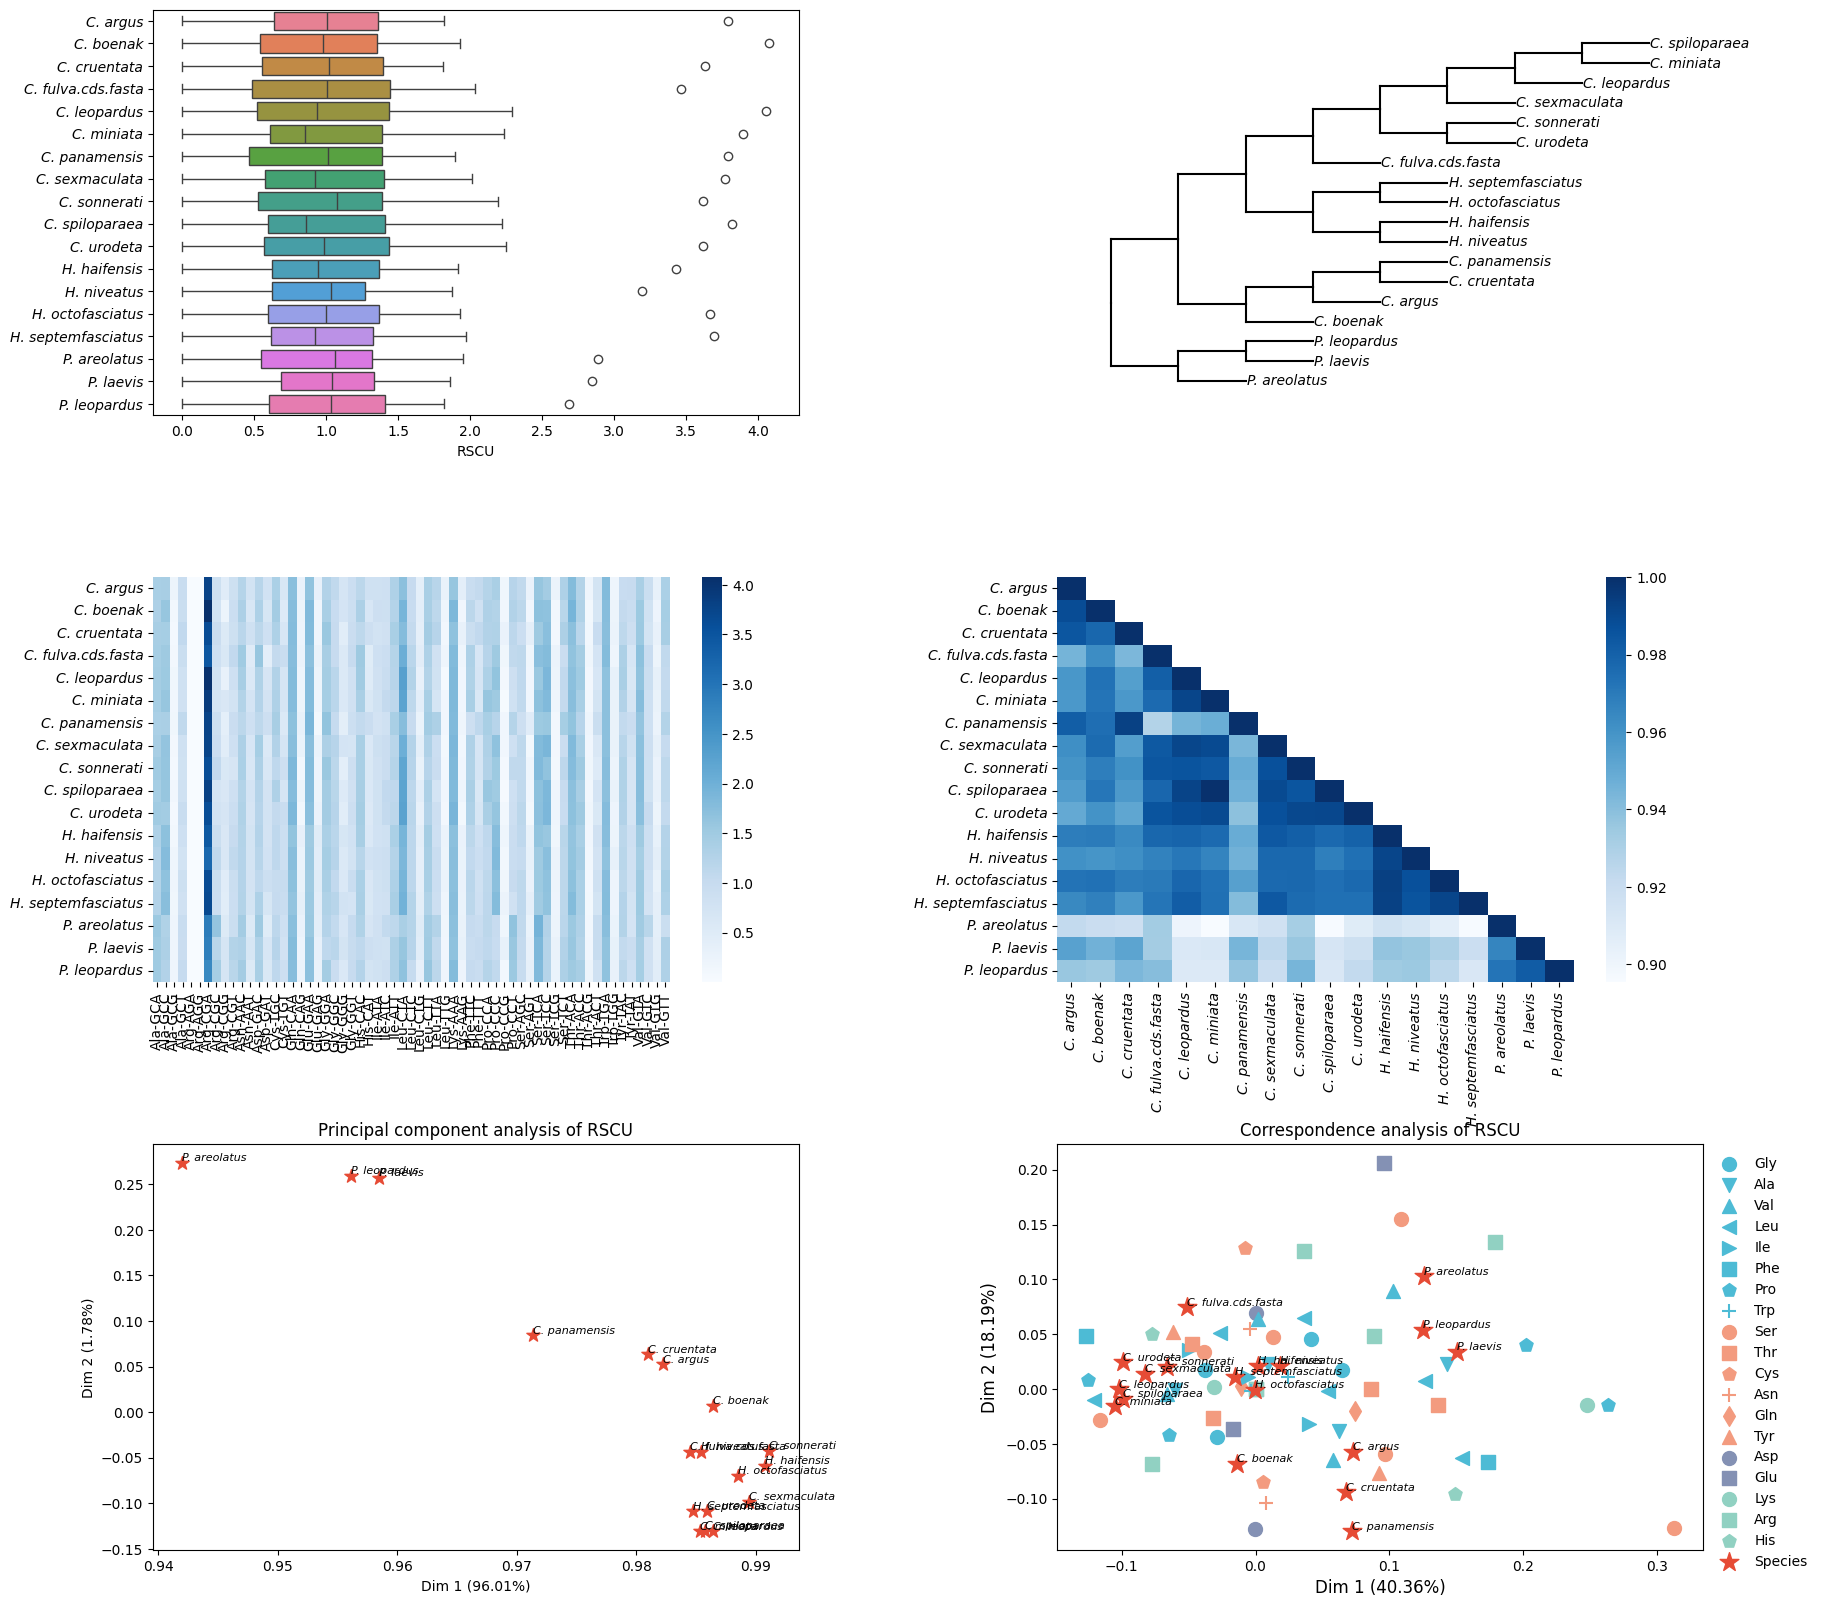

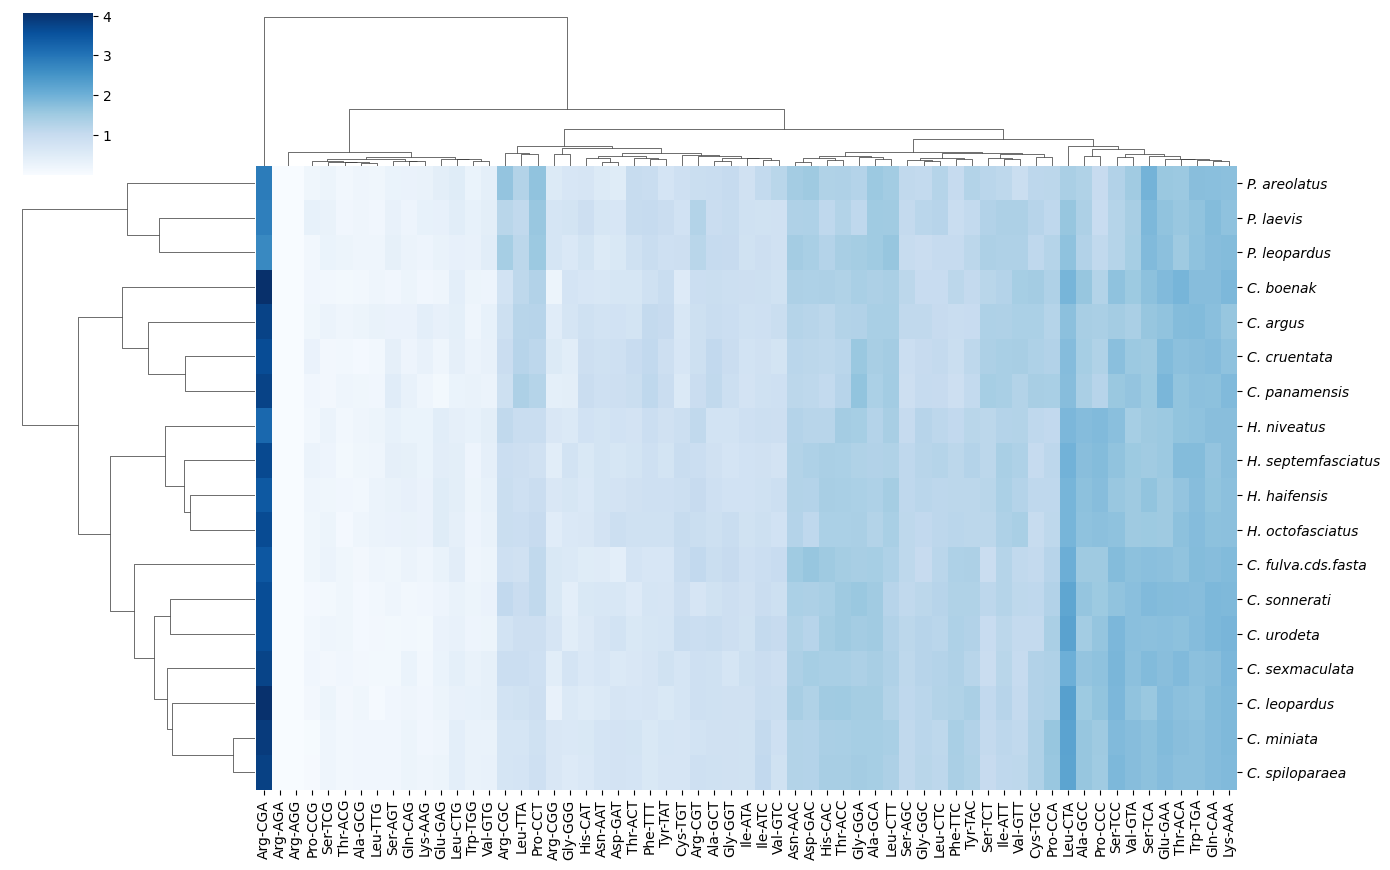

In [10]:
RSCU_Multiple_Species = pycubs.RSCU_Multiple_Species_Analysis(data=data, genetic_code=4)
fig, axs = plt.subplots(3,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.4,wspace=0.4)

RSCU_Multiple_Species.draw_boxplot(ax=axs[0][0])
RSCU_Multiple_Species.draw_tree_plot(ax=axs[0][1],
                                     outgroup=["P. areolatus", "P. laevis", "P. leopardus"], tree_method='nj')
RSCU_Multiple_Species.draw_heatmap(ax=axs[1][0])
RSCU_Multiple_Species.draw_pearson_heatmap(ax=axs[1][1])
RSCU_Multiple_Species.draw_PCA_plot(ax=axs[2][0])
RSCU_Multiple_Species.draw_COA_plot(ax=axs[2][1], show_codon_labels=False)

RSCU_Multiple_Species.draw_clustermap()

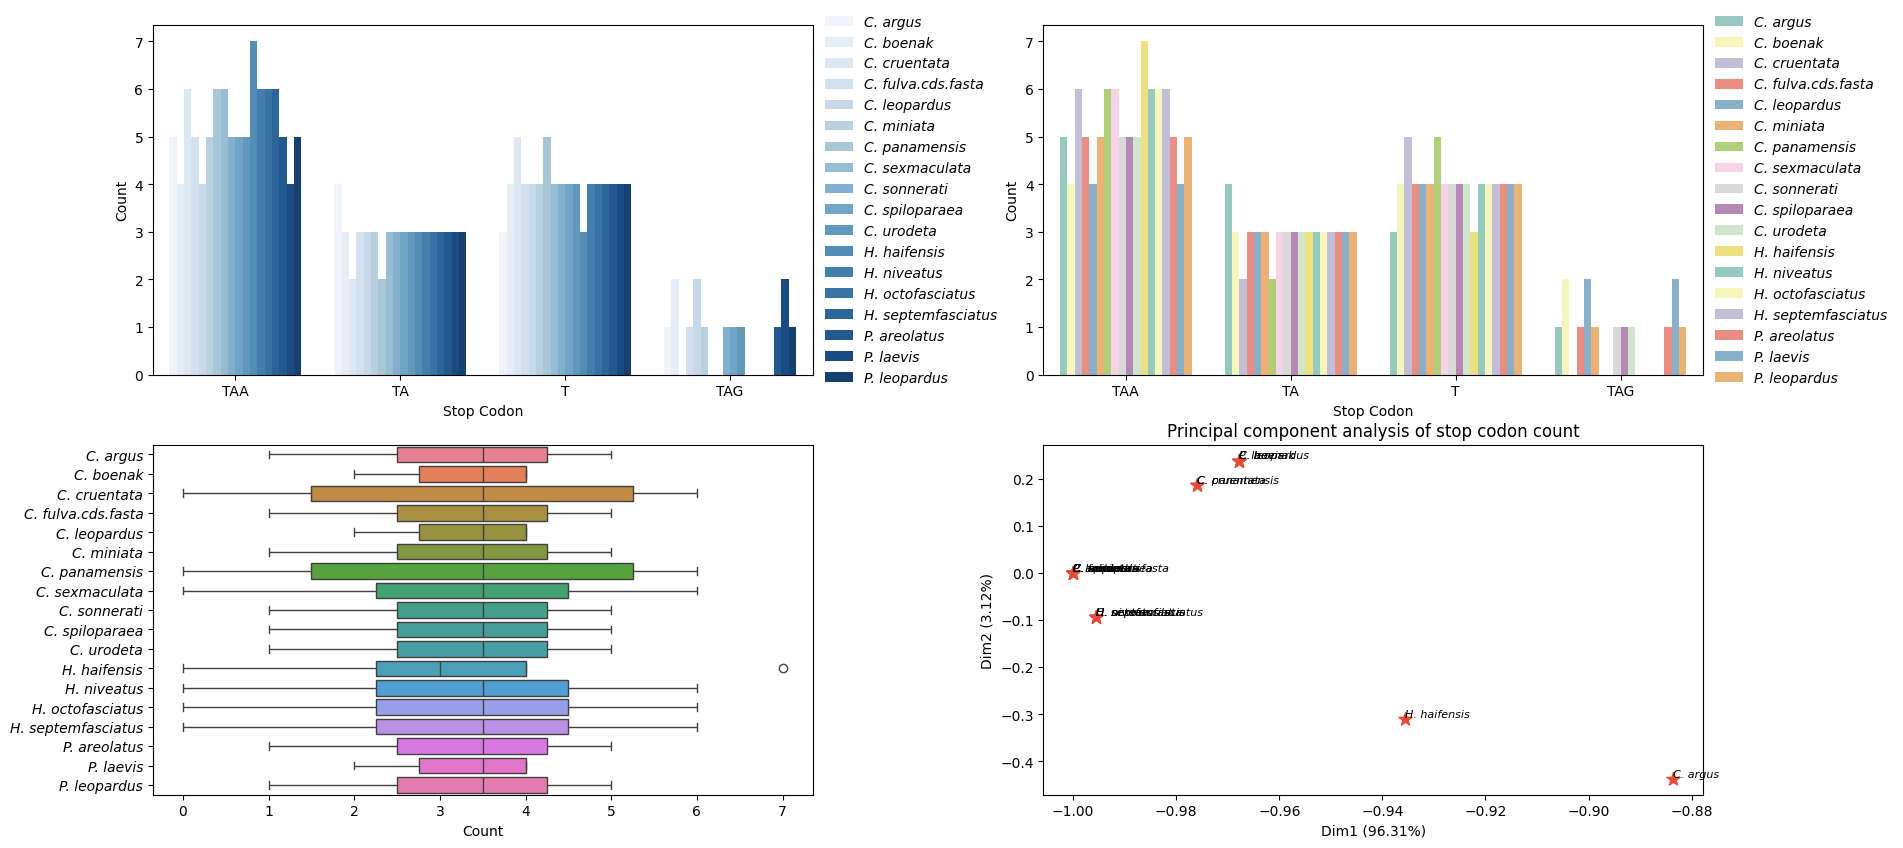

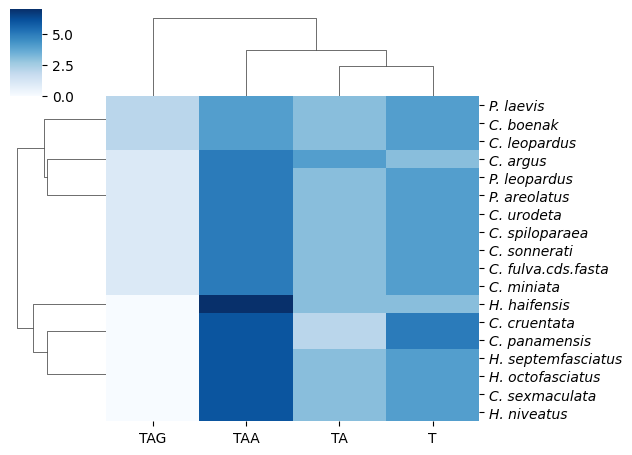

In [11]:
Stop_Codon = pycubs.Stop_Codon_Analysis(data=data, incomplete_codon=True, genetic_code=4)

fig, axs = plt.subplots(2,2, figsize=(20,10))
plt.subplots_adjust(wspace=0.35)

Stop_Codon.draw_barplot(ax=axs[0][0])
Stop_Codon.draw_barplot(ax=axs[0][1], palette="Set3")
Stop_Codon.draw_boxplot(ax=axs[1][0])
Stop_Codon.draw_PCA_plot(ax=axs[1][1])
Stop_Codon.draw_clustermap()

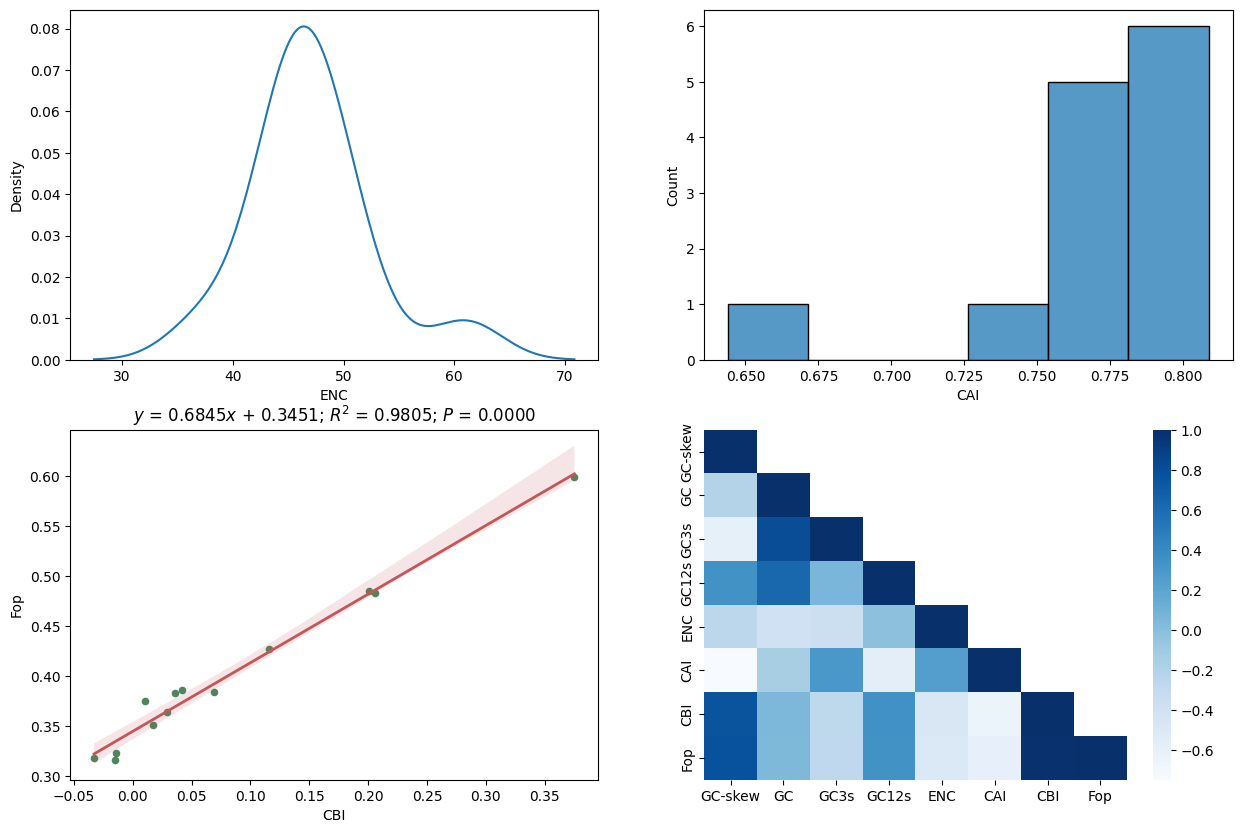

In [12]:
optimal_codons = pycubs.get_optimal_codons_from_ENC(file=data[0][1])
ref_Obs = pycubs.get_Obs(data[0][1], genetic_code=4)
Sequence_Indices = pycubs.Sequence_Indices_Analysis(file=data[0][1], genetic_code=1, optimal_codons=optimal_codons, cai_ref_Obs=ref_Obs)

fig, axs = plt.subplots(2,2,figsize=(15,10))
Sequence_Indices.draw_density_plot(x_axis="ENC", ax=axs[0][0])
Sequence_Indices.draw_histogram_plot(x_axis="CAI", ax=axs[0][1])
Sequence_Indices.draw_regression_plot(x_axis="CBI", y_axis="Fop", ax=axs[1][0])
Sequence_Indices.draw_pearson_heatmap(indices=["GC-skew","GC", "GC3s", "GC12s", "ENC", "CAI", "CBI", "Fop"], ax=axs[1][1])